In [18]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.models import Sequential, Model
from keras.models import model_from_json
# ## Plotly
# import plotly.offline as py
# import plotly.graph_objs as go
# py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE

import glove_dl23 as gd

In [4]:
ids = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/id.Dennis+Schwartz.txt", sep="[\r\n]+", header=None, names=["id"])
label_3class = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/label.3class.Dennis+Schwartz.txt", sep="[\r\n]+", names=["3class_label"])
label_4class = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/label.4class.Dennis+Schwartz.txt", sep="[\r\n]+",names=["4class_label"])
rating = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/rating.Dennis+Schwartz.txt", sep="[\r\n]+",names=["rating"])
subj = pd.read_csv("scale_data/scaledata/Dennis+Schwartz/subj.Dennis+Schwartz.txt", sep="[\r\n]+",names=["subj_extraction"])
dennis = pd.concat([ids,label_3class, label_4class, rating, subj], axis = 1)
dennis = dennis.sample(frac=1)

y_d = dennis['3class_label']
dennis['n']=dennis.apply(lambda x:x["3class_label"]==0, axis=1)
dennis["neg"]=dennis.apply(lambda x:x["3class_label"]==1, axis=1)
dennis["pos"]=dennis.apply(lambda x:x["3class_label"]==2, axis=1)
y_d_encode = dennis[['n', 'neg', 'pos']]
x_d = list(dennis['subj_extraction'])

x_d_padded = gd.padded_doc(x_d)


xtrain_d_padded, xvalid_d_padded, ytrain_d, yvalid_d = train_test_split(x_d_padded, y_d, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

xtrain_d_padded, xvalid_d_padded, ytrain_d_encode, yvalid_d_encode = train_test_split(x_d_padded, y_d_encode,  
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support 

In [5]:
ids = pd.read_csv("scale_data/scaledata/James+Berardinelli/id.James+Berardinelli.txt", sep="[\r\n]+", header=None, names=["id"])
# label_3class = pd.read_csv("scale_data/scaledata/James+Berardinelli/label.3class.James+Berardinelli.txt", sep="[\r\n]+", names=["3class_label"])
label_3class = pd.read_csv("scale_data/scaledata/James+Berardinelli/label.3class.James+Berardinelli.txt", sep="[\r\n]+",names=["3class_label"])

label_4class = pd.read_csv("scale_data/scaledata/James+Berardinelli/label.4class.James+Berardinelli.txt", sep="[\r\n]+",names=["4class_label"])
rating = pd.read_csv("scale_data/scaledata/James+Berardinelli/rating.James+Berardinelli.txt", sep="[\r\n]+",names=["rating"])
subj = pd.read_csv("scale_data/scaledata/James+Berardinelli/subj.James+Berardinelli.txt", sep="[\r\n]+",names=["subj_extraction"])

james = pd.concat([ids,label_3class, label_4class, rating, subj], axis = 1)
james = james.sample(frac=1)


james['n']=james.apply(lambda x:x["3class_label"]==0, axis=1)
james["neg"]=james.apply(lambda x:x["3class_label"]==1, axis=1)
james["pos"]=james.apply(lambda x:x["3class_label"]==2, axis=1)
y_j_encode = james[['n', 'neg', 'pos']]

x_j = james['subj_extraction']
y_j = james['3class_label']
x_j_padded = gd.padded_doc(x_j)

xtrain_j_padded, xvalid_j_padded, ytrain_j, yvalid_j = train_test_split(x_j_padded, y_j, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

xtrain_j_padded, xvalid_j_padded, ytrain_j_encode, yvalid_j_encode = train_test_split(x_j_padded, y_j_encode, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarnin

In [6]:
ids = pd.read_csv("scale_data/scaledata/Scott+Renshaw/id.Scott+Renshaw.txt", sep="[\r\n]+", header=None, names=["id"])
label_3class = pd.read_csv("scale_data/scaledata/Scott+Renshaw/label.3class.Scott+Renshaw.txt", sep="[\r\n]+", names=["3class_label"])
label_4class = pd.read_csv("scale_data/scaledata/Scott+Renshaw/label.4class.Scott+Renshaw.txt", sep="[\r\n]+",names=["4class_label"])
rating = pd.read_csv("scale_data/scaledata/Scott+Renshaw/rating.Scott+Renshaw.txt", sep="[\r\n]+",names=["rating"])
subj = pd.read_csv("scale_data/scaledata/Scott+Renshaw/subj.Scott+Renshaw.txt", sep="[\r\n]+",names=["subj_extraction"])

scott = pd.concat([ids,label_3class, label_4class, rating, subj], axis = 1)
scott = scott.sample(frac=1)
# y_s is a column with 3 values: 0,1,2
y_s = scott['3class_label']
scott['n']=scott.apply(lambda x:x["3class_label"]==0, axis=1)
scott["neg"]=scott.apply(lambda x:x["3class_label"]==1, axis=1)
scott["pos"]=scott.apply(lambda x:x["3class_label"]==2, axis=1)
# y_s_encode are three columns with binary values for each column
y_s_encode = scott[['n', 'neg', 'pos']]
x_s = scott['subj_extraction']

x_s_padded = gd.padded_doc(x_s)

xtrain_s_padded, xvalid_s_padded, ytrain_s, yvalid_s = train_test_split(x_s_padded, y_s, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

xtrain_s_padded, xvalid_s_padded, ytrain_s_encode, yvalid_s_encode = train_test_split(x_s_padded, y_s_encode, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support 

In [8]:
ids = pd.read_csv("scale_data/scaledata/Steve+Rhodes/id.Steve+Rhodes.txt", sep="[\r\n]+", header=None, names=["id"])
label_3class = pd.read_csv("scale_data/scaledata/Steve+Rhodes/label.3class.Steve+Rhodes.txt", sep="[\r\n]+", names=["3class_label"])
label_4class = pd.read_csv("scale_data/scaledata/Steve+Rhodes/label.4class.Steve+Rhodes.txt", sep="[\r\n]+",names=["4class_label"])
rating = pd.read_csv("scale_data/scaledata/Steve+Rhodes/rating.Steve+Rhodes.txt", sep="[\r\n]+",names=["rating"])
subj = pd.read_csv("scale_data/scaledata/Steve+Rhodes/subj.Steve+Rhodes.txt", sep="[\r\n]+",names=["subj_extraction"])

Rhodes = pd.concat([ids,label_3class, label_4class, rating, subj], axis = 1)
Rhodes = Rhodes.sample(frac=1)
# y_s is a column with 3 values: 0,1,2
y_r = Rhodes['3class_label']
Rhodes['n']=Rhodes.apply(lambda x:x["3class_label"]==0, axis=1)
Rhodes["neg"]=Rhodes.apply(lambda x:x["3class_label"]==1, axis=1)
Rhodes["pos"]=Rhodes.apply(lambda x:x["3class_label"]==2, axis=1)
# y_s_encode are three columns with binary values for each column
y_r_encode = Rhodes[['n', 'neg', 'pos']]
x_r = Rhodes['subj_extraction']

x_r_padded = gd.padded_doc(x_r)

xtrain_r_padded, xvalid_r_padded, ytrain_r, yvalid_r = train_test_split(x_r_padded, y_r, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

xtrain_r_padded, xvalid_r_padded, ytrain_r_encode, yvalid_r_encode = train_test_split(x_r_padded, y_r_encode, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=False)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support 

In [9]:
# total text
x_d = list(x_d)
x_j = list(x_j)
x_s = list(x_s)
x_r = list(x_r)
total_text = x_d+x_j+x_s+x_r

In [10]:
vocab_size, embedding_matrix, padded_docs = gd.get_glove_m(total_text)

## CNN

In [ ]:
def build_model(embedding_matrix, vocab_size):
    # define model
    embedding_dim = 50
    filter_sizes = (2, 4)
    num_filters = 10
    dropout_prob = (0.5, 0.8)
    hidden_dims = 50

    # Build model
    sequence_length = 3000
    input_shape = (sequence_length,)

    model_input = Input(shape=input_shape)

    # Static model does not have embedding layer

    z = Embedding(vocab_size, 100, input_length=sequence_length,weights=[embedding_matrix], name="embedding")(model_input)
    z.trainable = False
    
    z = Dropout(dropout_prob[0])(z)

    # Convolutional block
    conv_blocks = []
    for sz in filter_sizes:
        conv = Convolution1D(filters=num_filters,
                             kernel_size=sz,
                             padding="valid",
                             activation="relu",
                             strides=1)(z)
        conv = MaxPooling1D(pool_size=1)(conv)
        conv = Flatten()(conv)
        conv_blocks.append(conv)
    z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]

    z = Dropout(dropout_prob[1])(z)
    z = Dense(hidden_dims, activation="relu")(z)
    model_output = Dense(3, activation="sigmoid")(z)

    model = Model(model_input, model_output)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    weights = np.array([v for v in embedding_matrix])
    print("Initializing embedding layer with glove weights, shape", weights.shape)
    embedding_layer = model.get_layer("embedding")
    embedding_layer.set_weights([weights])
    return model

## pretrianed model

In [13]:
model_d = build_model(embedding_matrix, vocab_size)
history = model_d.fit(xtrain_d_padded, ytrain_d_encode, validation_data = (xvalid_d_padded, yvalid_d_encode), shuffle = False, epochs=10, verbose=1)

Initializing embedding layer with glove weights, shape (46260, 100)
Train on 821 samples, validate on 206 samples
Epoch 1/10
821/821 [==============================] - 20s 24ms/step - loss: 1.1126 - acc: 0.3910 - val_loss: 1.0817 - val_acc: 0.4369
Epoch 2/10
821/821 [==============================] - 20s 24ms/step - loss: 1.0836 - acc: 0.4287 - val_loss: 1.0775 - val_acc: 0.4272
Epoch 3/10
821/821 [==============================] - 22s 26ms/step - loss: 1.0643 - acc: 0.4251 - val_loss: 1.0855 - val_acc: 0.4078
Epoch 4/10
821/821 [==============================] - 23s 28ms/step - loss: 1.0795 - acc: 0.4105 - val_loss: 1.0697 - val_acc: 0.4126
Epoch 5/10
821/821 [==============================] - 22s 27ms/step - loss: 1.0446 - acc: 0.4251 - val_loss: 1.0790 - val_acc: 0.3738
Epoch 6/10
821/821 [==============================] - 21s 25ms/step - loss: 1.0340 - acc: 0.4105 - val_loss: 1.0741 - val_acc: 0.4126
Epoch 7/10
821/821 [==============================] - 21s 26ms/step - loss: 1.0203

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


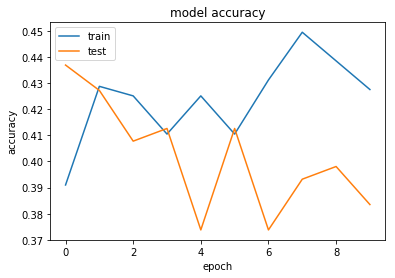

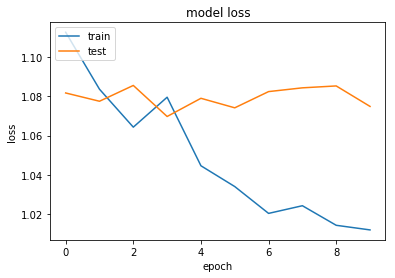

In [14]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# serialize model to JSON
model_cnn_json = model_d.to_json()
with open("model_gl_cnn.json", "w") as json_file:
    json_file.write(model_cnn_json)
# serialize weights to HDF5
model_d.save_weights("model_gl_cnn.h5")
print("Saved model to disk")

Saved model to disk


## Fit pretrained model on the second writer j

In [19]:
# load json and create model
json_file = open('model_gl_cnn.json', 'r')
loaded_model_cnn_json = json_file.read()
json_file.close()
loaded_model_cnn = model_from_json(loaded_model_cnn_json)
# load weights into new model
loaded_model_cnn.load_weights("model_gl_cnn.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model_cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model_cnn.evaluate(xvalid_j_padded, yvalid_j_encode, verbose=1)
print("%s: %.2f%%" % (loaded_model_cnn.metrics_names[1], score[1]*100))
# loaded_model.summary()


Loaded model from disk
262/262 [==============================] - 2s 7ms/step
acc: 32.44%


## train model on the second writer j

In [22]:
model_j = build_model(embedding_matrix, vocab_size)
train_on_j = model_j.fit(xtrain_j_padded, ytrain_j_encode, validation_data = (xvalid_j_padded, yvalid_j_encode), shuffle = False, epochs=10, verbose=1)

Initializing embedding layer with glove weights, shape (46260, 100)
Train on 1045 samples, validate on 262 samples
Epoch 1/10
1045/1045 [==============================] - 31s 30ms/step - loss: 1.0609 - acc: 0.4804 - val_loss: 1.0427 - val_acc: 0.4504
Epoch 2/10
1045/1045 [==============================] - 32s 30ms/step - loss: 1.0111 - acc: 0.4833 - val_loss: 1.0163 - val_acc: 0.4733
Epoch 3/10
1045/1045 [==============================] - 29s 27ms/step - loss: 0.9867 - acc: 0.4842 - val_loss: 1.0208 - val_acc: 0.4733
Epoch 4/10
1045/1045 [==============================] - 27s 26ms/step - loss: 0.9763 - acc: 0.4842 - val_loss: 1.0308 - val_acc: 0.4733
Epoch 5/10
1045/1045 [==============================] - 27s 26ms/step - loss: 0.9518 - acc: 0.4833 - val_loss: 1.0255 - val_acc: 0.4733
Epoch 6/10
1045/1045 [==============================] - 27s 26ms/step - loss: 0.9391 - acc: 0.4842 - val_loss: 1.0174 - val_acc: 0.4733
Epoch 7/10
1045/1045 [==============================] - 27s 26ms/step

In [23]:
print(train_on_j.train_on_j.keys())
# summarize history for accuracy
plt.plot(train_on_j.train_on_j['acc'])
plt.plot(train_on_j.train_on_j['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_on_j.train_on_j['loss'])
plt.plot(train_on_j.train_on_j['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: 'History' object has no attribute 'train_on_j'

In [ ]:
model_d = build_model(embedding_matrix, vocab_size)
history = model_d.fit(xtrain_d_padded, ytrain_d_encode, validation_data = (xvalid_d_padded, yvalid_d_encode), shuffle = False, epochs=10, verbose=1)

## Train model on the  third writer s

In [24]:
model_s = build_model(embedding_matrix, vocab_size)
train_on_s = model_s.fit(xtrain_s_padded, ytrain_s_encode, validation_data = (xvalid_s_padded, yvalid_s_encode), shuffle = False, epochs=10, verbose=1)

Initializing embedding layer with glove weights, shape (46260, 100)
Train on 721 samples, validate on 181 samples
Epoch 1/10
721/721 [==============================] - 17s 24ms/step - loss: 1.1438 - acc: 0.3412 - val_loss: 1.0986 - val_acc: 0.3702
Epoch 2/10
721/721 [==============================] - 16s 22ms/step - loss: 1.0983 - acc: 0.3870 - val_loss: 1.0982 - val_acc: 0.4088
Epoch 3/10
721/721 [==============================] - 18s 25ms/step - loss: 1.0984 - acc: 0.3745 - val_loss: 1.0976 - val_acc: 0.4199
Epoch 4/10
721/721 [==============================] - 18s 25ms/step - loss: 1.0979 - acc: 0.4147 - val_loss: 1.0793 - val_acc: 0.3812
Epoch 5/10
721/721 [==============================] - 18s 25ms/step - loss: 1.0968 - acc: 0.4050 - val_loss: 1.0922 - val_acc: 0.3646
Epoch 6/10
721/721 [==============================] - 18s 25ms/step - loss: 1.0903 - acc: 0.4092 - val_loss: 1.0956 - val_acc: 0.3757
Epoch 7/10
721/721 [==============================] - 18s 25ms/step - loss: 1.1013

In [ ]:
print(train_on_s.train_on_s.keys())
# summarize history for accuracy
plt.plot(train_on_s.train_on_s['acc'])
plt.plot(train_on_s.train_on_s['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_on_s.train_on_s['loss'])
plt.plot(train_on_s.train_on_s['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Fit pretrained model on the  third writer s

In [25]:
# evaluate loaded model on test data
loaded_model_cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model_cnn.evaluate(xvalid_s_padded, yvalid_s_encode, verbose=1)
print("%s: %.2f%%" % (loaded_model_cnn.metrics_names[1], score[1]*100))

181/181 [==============================] - 2s 8ms/step
acc: 33.33%


## Fit pretrained model on the  third writer r

In [26]:
# evaluate loaded model on test data
loaded_model_cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model_cnn.evaluate(xvalid_r_padded, yvalid_r_encode, verbose=1)
print("%s: %.2f%%" % (loaded_model_cnn.metrics_names[1], score[1]*100))

354/354 [==============================] - 3s 8ms/step
acc: 34.37%


In [27]:
model_r = build_model(embedding_matrix, vocab_size)
train_on_r = model_r.fit(xtrain_r_padded, ytrain_r_encode, validation_data = (xvalid_r_padded, yvalid_r_encode), shuffle = False, epochs=10, verbose=1)

Initializing embedding layer with glove weights, shape (46260, 100)
Train on 1416 samples, validate on 354 samples
Epoch 1/10
1416/1416 [==============================] - 38s 27ms/step - loss: 1.1220 - acc: 0.3764 - val_loss: 1.0975 - val_acc: 0.3644
Epoch 2/10
1416/1416 [==============================] - 37s 26ms/step - loss: 1.0891 - acc: 0.3644 - val_loss: 1.1107 - val_acc: 0.3955
Epoch 3/10
1416/1416 [==============================] - 37s 26ms/step - loss: 1.0925 - acc: 0.3609 - val_loss: 1.0801 - val_acc: 0.3983
Epoch 4/10
1416/1416 [==============================] - 37s 26ms/step - loss: 1.0705 - acc: 0.3637 - val_loss: 1.0800 - val_acc: 0.4068
Epoch 5/10
1416/1416 [==============================] - 37s 26ms/step - loss: 1.0590 - acc: 0.3623 - val_loss: 1.0747 - val_acc: 0.3983
Epoch 6/10
1416/1416 [==============================] - 37s 26ms/step - loss: 1.0577 - acc: 0.3573 - val_loss: 1.0753 - val_acc: 0.3983
Epoch 7/10
1416/1416 [==============================] - 37s 26ms/step